In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

In [4]:
df= pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df1= df.drop(['Type'],axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Performing PCA

In [7]:
# Converting into numpy array
DF1 = df1.values
DF1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(DF1)

In [10]:
df_norm

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

In [11]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_norm)

In [12]:
pca_values

array([[ 1.89635495e-01,  1.27939250e-02,  1.86367678e-03, ...,
         5.28219472e-05, -2.29467534e-05,  4.77801459e-05],
       [ 1.80429093e-01, -3.19353145e-03,  4.06152589e-03, ...,
         2.36793241e-05, -3.40452399e-05,  8.09154665e-06],
       [ 2.60770853e-01, -3.89155676e-03, -6.62684006e-04, ...,
         1.41540730e-04, -2.90486020e-05, -2.10779181e-05],
       ...,
       [ 5.26576900e-02,  1.11772248e-02, -1.33199385e-03, ...,
        -1.32777740e-04,  5.71761518e-05,  2.15343422e-05],
       [ 5.56330203e-02,  1.11144429e-02, -1.06460114e-03, ...,
        -1.81013009e-05, -3.10079415e-05,  7.90293761e-05],
       [-1.11284320e-01, -1.26992448e-04, -3.35175331e-03, ...,
         9.56770872e-05,  1.90015753e-05,  1.60351688e-05]])

In [13]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [14]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

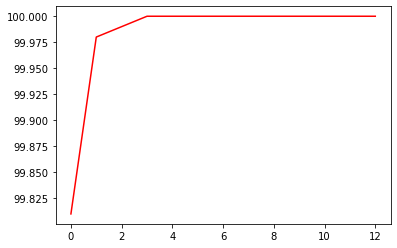

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [17]:
finaldf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), df[['Type']]], axis = 1)
finaldf

,pc1,pc2,pc3,Type
0,0.189635,0.012794,0.001864,1
1,0.180429,-0.003194,0.004062,1
2,0.260771,-0.003892,-0.000663,1
3,0.436486,0.000115,-0.000546,1
4,-0.006888,0.011007,-0.000330,1
...,...,...,...,...
173,-0.004155,-0.002703,-0.001473,3
174,0.001864,0.001390,-0.002566,3
175,0.052658,0.011177,-0.001332,3
176,0.055633,0.011114,-0.001065,3


## Performing K-Means Clustering

In [ ]:
#Using with Elbow method to find the optimum no of clusters

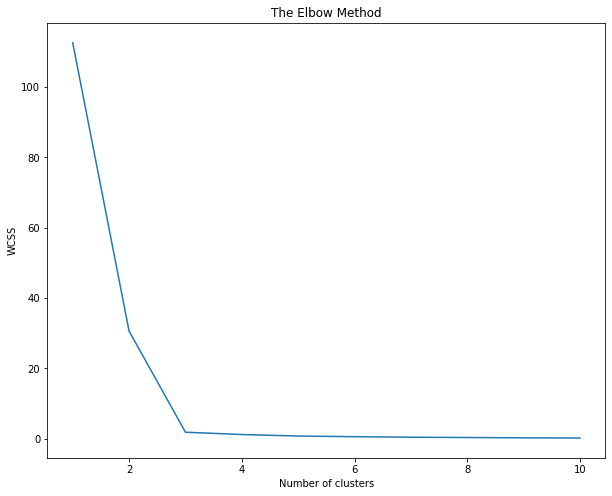

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#As per this plot, optimum number of clusters= 3

#To confirm the same, using Silhouette score's method

In [19]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(finaldf).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(finaldf,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7046376244196593
Silhouette score for k(clusters) = 3 is 0.8906887433929628
Silhouette score for k(clusters) = 4 is 0.7934893991312632
Silhouette score for k(clusters) = 5 is 0.6822063035193946
Silhouette score for k(clusters) = 6 is 0.6914427573862977
Silhouette score for k(clusters) = 7 is 0.5852242596504938
Silhouette score for k(clusters) = 8 is 0.5991039010559513
Silhouette score for k(clusters) = 9 is 0.6002899535946985
Silhouette score for k(clusters) = 10 is 0.5808685430101843
Silhouette score for k(clusters) = 11 is 0.5854630977632372


In [ ]:
#As per the Silhouette score also, K= 3 is the optimum number of clusters

In [20]:
#Hence
model=KMeans(n_clusters=3) 
model.fit(finaldf)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:7].groupby(df.kclust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols
kclust,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169
1,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873


Text(0.5, 0.98, 'Relative comparison of people in respective clusters')

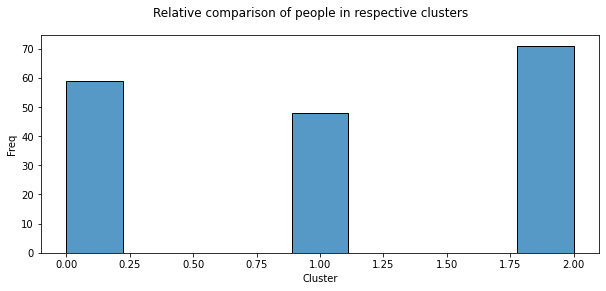

In [22]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=df)
plt.xlabel('Cluster')
plt.ylabel('Freq')
plt.suptitle('Relative comparison of people in respective clusters')

## Hierarchical Clustering

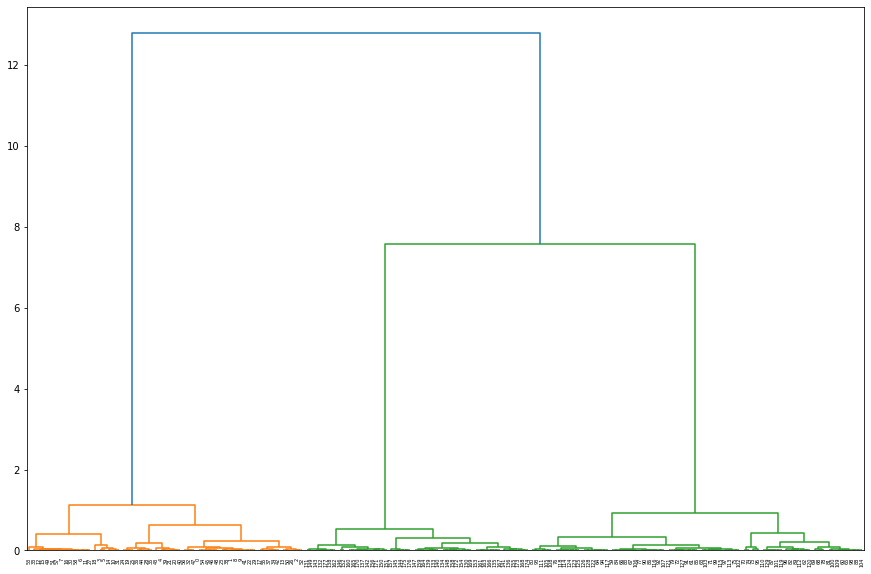

In [23]:
# create dendrogram
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(finaldf, method='ward'))

#### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 2 and cut the dendrogram:

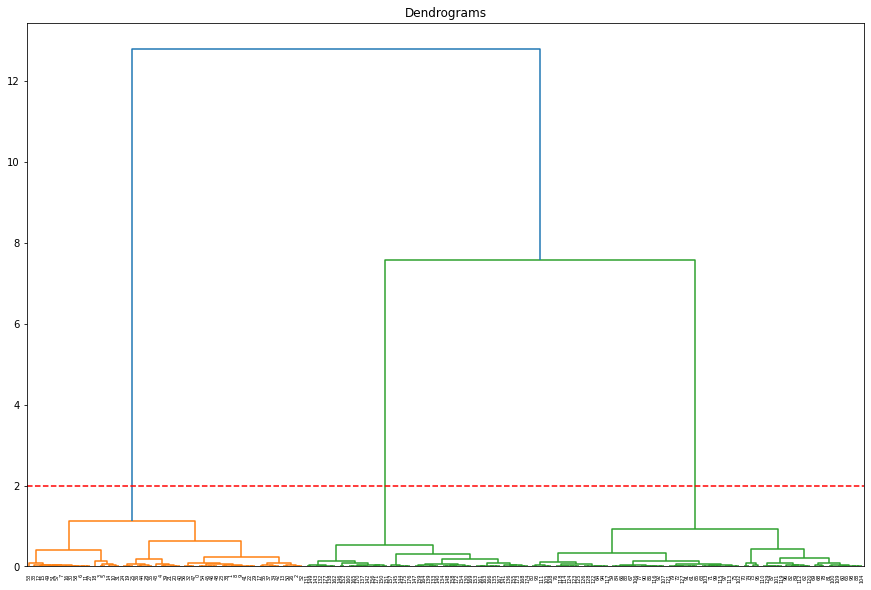

In [24]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(finaldf, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

## Now, testing for optimum no of clusters in the case of original dataset (without PCA)

In [25]:
df_norm1 = norm_func(df1)

## Performing K-Means Clustering

In [ ]:
# Using elbow method:

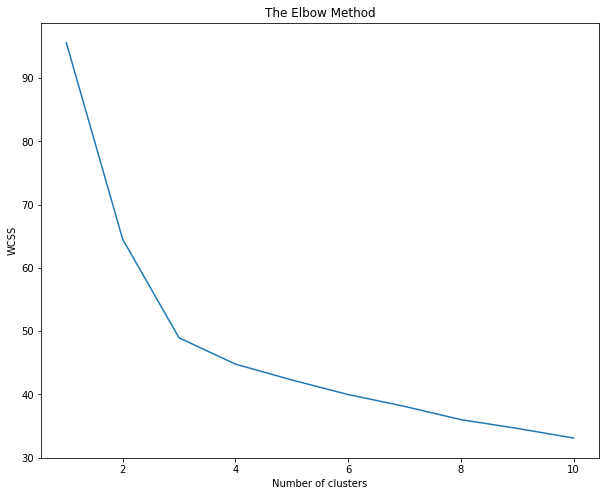

In [26]:
wcss1 = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 200)
    kmeans1.fit(df_norm1)
    wcss1.append(kmeans1.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### As per the elbow plot, it seems that the optimum number of clusters= 3

#### To confirm the optimum no of clusters, using silhouettes

In [28]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_norm1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_norm1,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.29872218159747743
Silhouette score for k(clusters) = 3 is 0.30134632735032324
Silhouette score for k(clusters) = 4 is 0.25975014122369366
Silhouette score for k(clusters) = 5 is 0.24103548914472728
Silhouette score for k(clusters) = 6 is 0.2001319992999053
Silhouette score for k(clusters) = 7 is 0.13262302760860342
Silhouette score for k(clusters) = 8 is 0.1493889274699824
Silhouette score for k(clusters) = 9 is 0.13953165088987174
Silhouette score for k(clusters) = 10 is 0.141450498548086
Silhouette score for k(clusters) = 11 is 0.14388798417780793
Silhouette score for k(clusters) = 12 is 0.14473079778938786


## Performing Hierarchical clustering

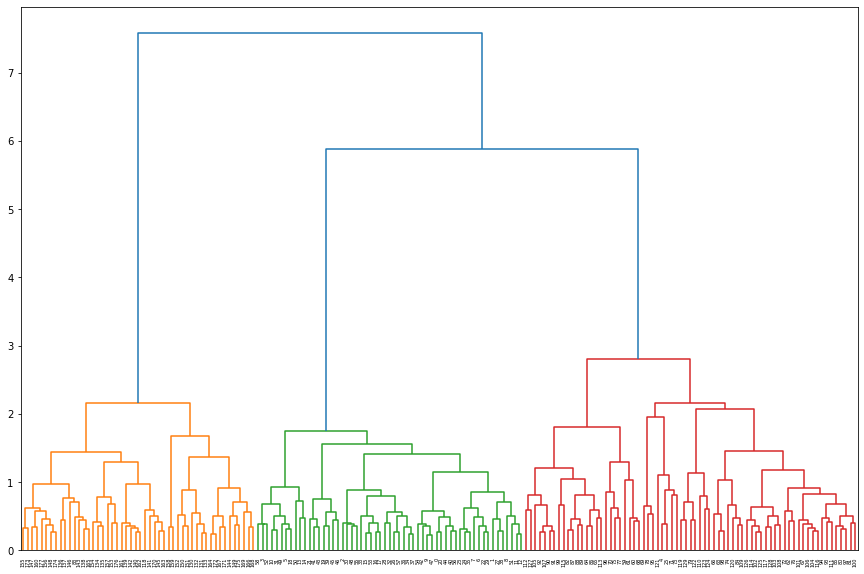

In [30]:
# create dendrogram
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method='ward'))

## So number of clusters is the same (=3)